# Predicting Heart Disease using Machine Learning

This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine learning model capable of preddicting whether or not someone has heart disease based on their medical attributes.

**The entire walkthrough of the project is based on the following approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland database from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95%  accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

**Information about each feature in the data**

1. `age` in years

2. `sex` (1 = male, 0 = female)

3. `cp` - chest pain type (4 values)
    * 0: Typical Angina : Chest pain related to decreased blood supply to the heart
    * 1: Atypical Angina : Chest pain not related to heart
    * 2: Non-angina pain : Typically oeshophagial spasms (Not related to heart)
    * 3: Asymptomatic : Chest pain not showing signs of disease
    
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
    * Anything above 130-140 is typically the cause for concern
    
5. `chol` - serum cholestoral in mg/dl
    * Above 200 is cause for concern
    
6. `fbs`- fasting blood sugar > 120 mg/dl
    * 1 = true, 0 = false
    * '>126 mg/dL' signals Diabetes
    
7. `restecg`- resting electrocardiographic results (values 0,1,2)
    * 0: Nothing to note
    * 1: ST-T wave abnormality which can range from mild symptoms to severe problems. It also signals non-normal heartbeat
    * 2: Possible or definite left ventricular hypertrophy i.e) Enlarged heart's main pumping chamber
8. `thalach` maximum heart rate achieved 

9. `exang` - exercise induced angina (1 = yes; 0 = no) 

10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
    
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

Here Pandas, Matplotlib and NumPy are used for data analysis and manipulation

In [2]:
# Importing all the tools that we gonna use

# Regular EDA and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

In [3]:
## Load data
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration or Exploratory Data Analysis (EDA) 

The goal here is to find more about the data and become a subject matter expert on the data. This can be achieved by answering the following questions.
1. What questions are you trying to solve?
2. What kind of data do we have? (Structured/ Unstructured)
3. How do we treat different types of data like numerical, categorical etc..
4. What is missing from the data and how do you deal with it?
5. How can you add, change or remove features to get more out of your data? (Dealing with out-liers)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Finding out how many samples does each target class have
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

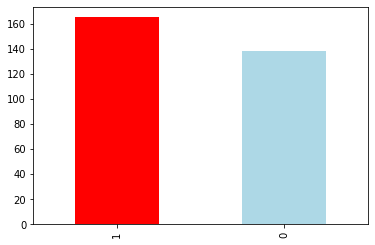

In [9]:
df["target"].value_counts().plot(kind='bar', color=["Red", "lightblue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [13]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# Comparing 'target' column with 'sex' column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


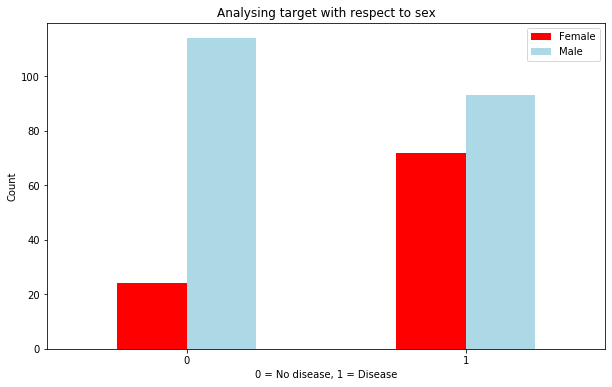

In [27]:
# Creating a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                   color = ['red','lightblue'],
                                   figsize = (10,6),
                                   title = 'Analysing target with respect to sex')
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

### Age vs Max Heart Rate for Heart Disease

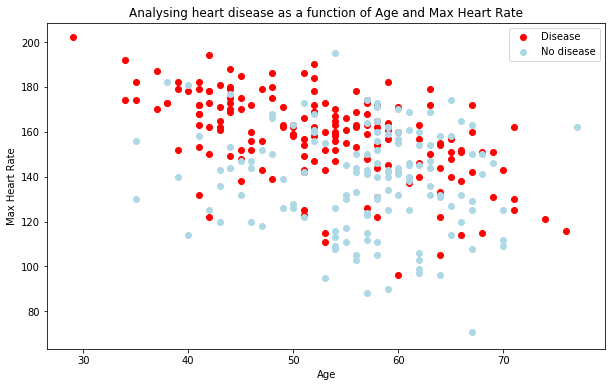

In [33]:
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = 'red')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = 'lightblue');

# Adding some info
plt.title("Analysing heart disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease','No disease']);

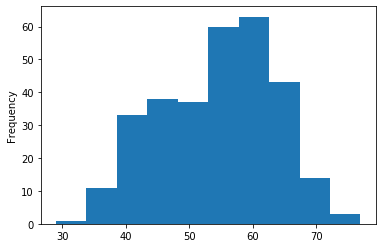

In [34]:
# Checking the distribution of age column with a histogram # (This is mostly done to check for outliers)
df.age.plot.hist(); 

### Heart Disease frequency with respect to chest pain
`cp` - chest pain type (4 values)
   * 0: Typical Angina : Chest pain related to decreased blood supply to the heart
   * 1: Atypical Angina : Chest pain not related to heart
   * 2: Non-angina pain : Typically oeshophagial spasms (Not related to heart)
   * 3: Asymptomatic : Chest pain not showing signs of disease

In [35]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


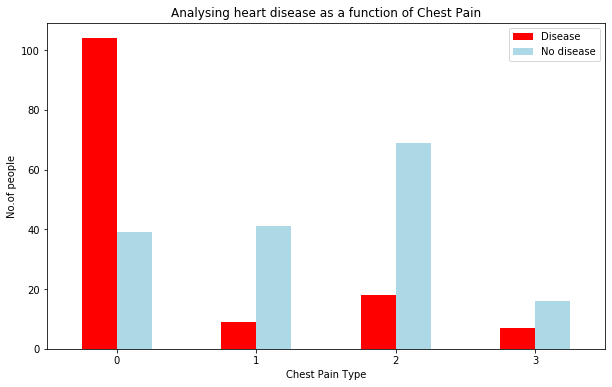

In [37]:
# Visualising
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                  figsize = (10,6),
                                  color=["red","lightblue"])

# Adding some info
plt.title("Analysing heart disease as a function of Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("No.of people")
plt.legend(['Disease','No disease'])
plt.xticks(rotation=0);

In [39]:
# Building a correlation matrix (correlation matrix gives some intuition about the how the independent features are related with each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


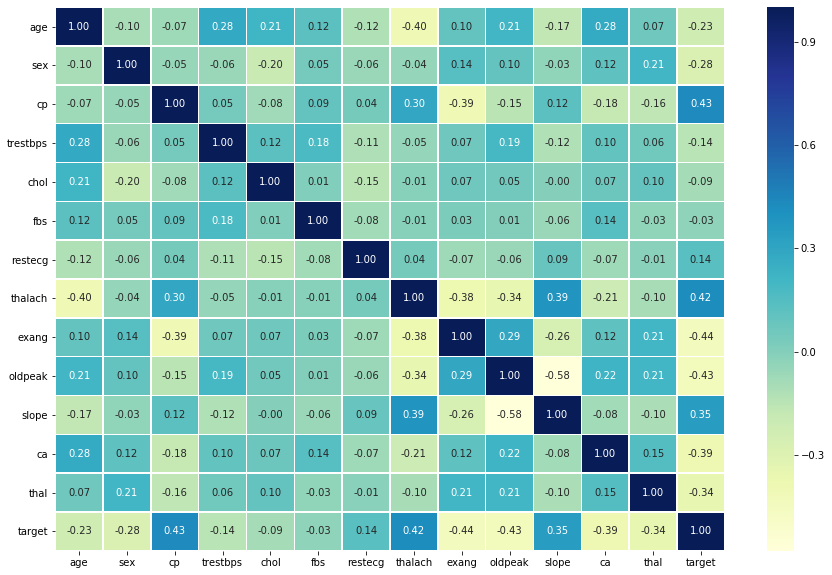

In [46]:
# Visualising using seaborn
corr_mat = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sb.heatmap(corr_mat,
               annot = True,
               linewidths = 0.5,
               fmt = '.2f',
               cmap = 'YlGnBu');

In [48]:
# Inference from correlation matrix:
# Correlation between cp and target --> Positive Correlation of 0.43 as cp increases target also increases
# Correlation between exang and target --> negative correlation of -0.44 as exang decreases target also decreases

## 5. Modelling

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# splitting data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [51]:
# Splitting data into train and test data
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Building and training machine learning model(i.e. making it find the patterns) and then evaluating it using a test set.

Let's try 3 different Machine Learning Models:
1. Logistic regression
2. K-Nearest Neighbours classification
3. Random Forest Classifier

In [52]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate the given machine learning models
    models: A dictionary of different scikit-learn machine learning models
    X_train: Training data with no labels
    X_test: Test data with no labels
    y_train: Training labels
    y_test: Test labels
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        # Fitting model to data
        model.fit(X_train, y_train)
        
        # Evaluating the model and appending its score to the dictionary that we have created
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [54]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

C:\Users\GOMATHI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [57]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.shape

(1, 3)

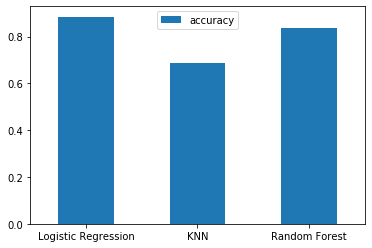

In [60]:
model_compare.T.plot.bar()
plt.xticks(rotation=0);

Let's look at the following :
* Hyperparameter tuning 
* Feature Importance
* Confusion_matrix
* cross_validation
* Prediction
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the Curve (AUC)

### Hyperparameter tuning (manually)


In [61]:
# Tuning KNN
train_score = []
test_score = []

# Creating a list of different values for n_neighbors
neighbors = range(1,21)

# setting up an instance
knn = KNeighborsClassifier()

# Looping through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fitting the algorithm
    knn.fit(X_train, y_train)
    
    # Updating training score list
    train_score.append(knn.score(X_train, y_train))
    
    # Updatng test score list
    test_score.append(knn.score(X_test, y_test))

In [62]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [63]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


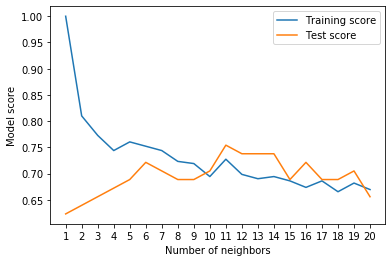

In [70]:
# Let's visualise
plt.plot(neighbors, train_score, label = 'Training score')
plt.plot(neighbors, test_score, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

Maximum KNN score on the test data: 75.41%


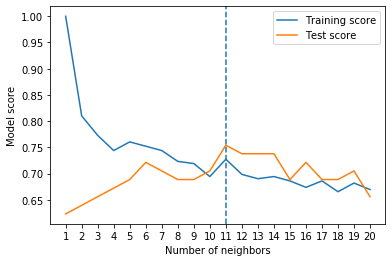

In [73]:
# Let's visualise
plt.plot(neighbors, train_score, label = 'Training score')
plt.plot(neighbors, test_score, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

# checking the exact no.of neighbors
plt.axvline(x=11, ymin=0, ymax=1, linestyle='--');

#### Inference : When we tune the hyperparameter n_neighbors from default value of 3 to 11, we are getting better score than before

Since even after hyperparameter tuning of KNN, the scores of Logistic regression and RandomForestClassifier are in lead. Hence let us focus on them discarding KNN :) 

### Hyperparameter tuning with RandomizedSearchCV
We are going to tune 
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [134]:
# Creating a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver":['liblinear']}

# Create a hyperparameter grid for random forest classifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3 ,5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [130]:
# Tuning Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for logistic regression
rscv_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 verbose=True,
                                 n_iter=10)

rscv_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [131]:
rscv_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [132]:
rscv_log_reg.score(X_test, y_test)

0.8852459016393442

In [135]:
# Let's tune for Random Forest Classifier
np.random.seed(42)

# Setup random hyperparameter search for Random Forest Classifier
rscv_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             verbose=True,
                             n_iter=10)

rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [136]:
# Find the best hhyperparameters
rscv_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [137]:
# Evaluate the RandomizedSearch RandomForestClassifier model
rscv_rf.score(X_test, y_test)   

0.8688524590163934

#### Even though hyperparameter tuning increased the performance of RandomForestClassifier, still Logistic Regression model lead the score.
Hence we'll try and improve LogisticRegression using GridSearchCV

In [145]:
# Tuning Logistic Regression by GridSearchCV
np.random.seed(42)

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup random hyperparameter search for logistic regression
gscv_log_reg = GridSearchCV(estimator=LogisticRegression(),
                                 param_grid=log_reg_grid,
                                 cv=5,
                                 verbose=True)

gscv_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [146]:
gscv_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [147]:
gscv_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating tuned machine learning  classifier beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

In [149]:
#To make comparisons and evaluation on our tuned model, let's make some predictions 
y_preds = gscv_log_reg.predict(X_test)

In [150]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [152]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

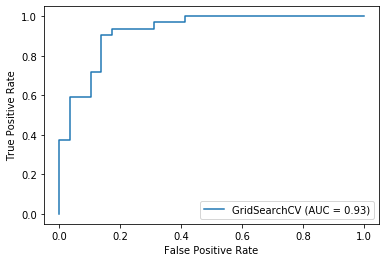

In [154]:
# Plotting ROC curve and calculating AUC metric
plot_roc_curve(gscv_log_reg, X_test, y_test);

In [156]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


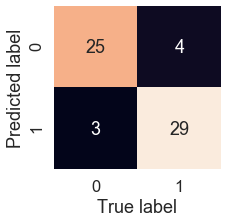

In [160]:
# Let's visualise
sb.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using seaborn's heatmap module
    """
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sb.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

**Next steps: To get classification report as well as cross-validated precision, recall, f1-score**

In [161]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculating the metrics (accuracy, precision, recall, f1-score) using cross-validation

In [163]:
# Best parameters
gscv_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [164]:
# Creating a classifier with new parameter
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

In [169]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        scoring = 'accuracy',
                        cv = 5)
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [170]:
# Cross-validated precison
cv_prec = cross_val_score(clf,
                        X,
                        y,
                        scoring = 'precision',
                        cv = 5)
cv_prec = cv_prec.mean()
cv_prec

0.8207936507936507

In [171]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        scoring = 'recall',
                        cv = 5)
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [172]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        scoring = 'f1',
                        cv = 5)
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

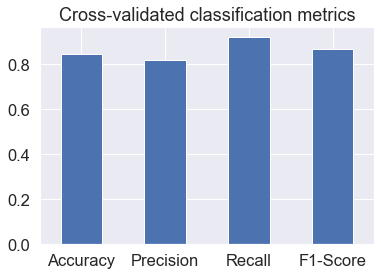

In [180]:
# Visualizing cross-validated matrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1-Score": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend = False)
plt.xticks(rotation=0)

### Feature Importance
 It is asking, "Which features contributed most to the outcome of the model and how did they contribute?" <br/>
 It is different for different machine learning models <br/>
 Let's find feature importance for our LogisticRegression model

In [181]:
# Fitting an instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [182]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [184]:
# Matching coef of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

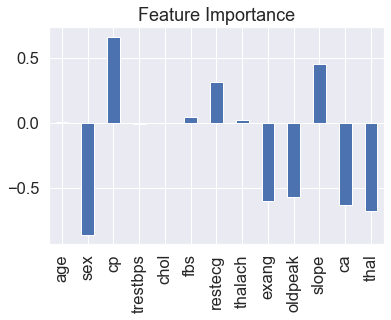

In [186]:
# Visualising feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend=False);

In [187]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [188]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation
 
 Still in process. Yet to try with some other classifiers to improve the result